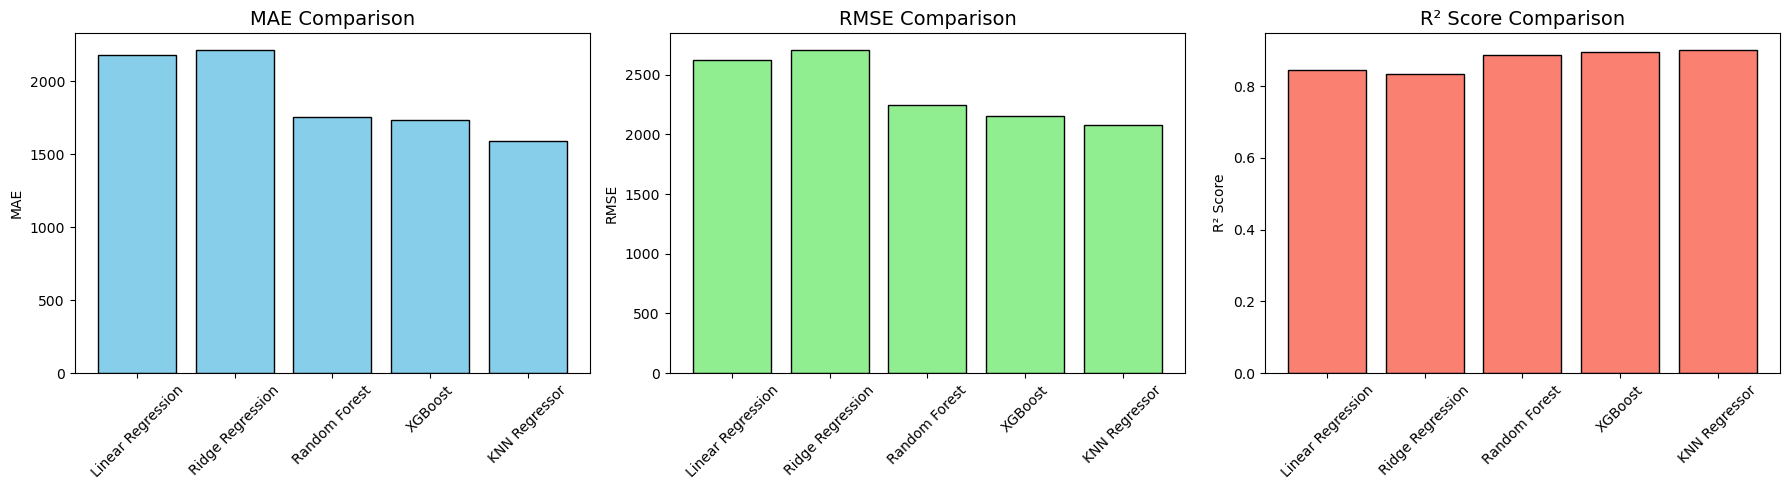

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 模型性能数据
models = ["Linear Regression", "Ridge Regression", "Random Forest", "XGBoost", "KNN Regressor"]
mae = [2182.10, 2218.50, 1755.84, 1734.57, 1593.18]
rmse = [2622.62, 2711.77, 2244.47, 2154.71, 2083.18]
r2 = [0.8453, 0.8346, 0.8867, 0.8956, 0.9024]

# 设置子图
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE 条形图
axes[0].bar(models, mae, color='skyblue', edgecolor='black')
axes[0].set_title("MAE Comparison", fontsize=14)
axes[0].set_ylabel("MAE")
axes[0].tick_params(axis='x', rotation=45)

# RMSE 条形图
axes[1].bar(models, rmse, color='lightgreen', edgecolor='black')
axes[1].set_title("RMSE Comparison", fontsize=14)
axes[1].set_ylabel("RMSE")
axes[1].tick_params(axis='x', rotation=45)

# R² Score 条形图
axes[2].bar(models, r2, color='salmon', edgecolor='black')
axes[2].set_title("R² Score Comparison", fontsize=14)
axes[2].set_ylabel("R² Score")
axes[2].tick_params(axis='x', rotation=45)

# 美化布局
plt.tight_layout()
plt.show()


Best Parameters: {'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
MAE: 1593.18
RMSE: 2083.18
R²: 0.9024


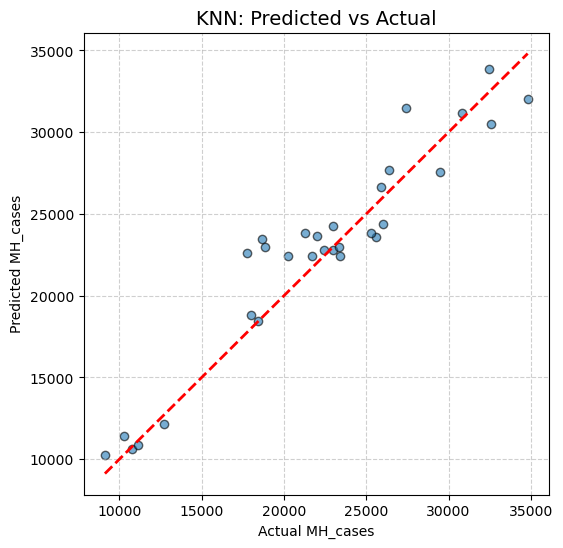

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_excel("part c data.xlsx", sheet_name="Sheet1")
df_clean = df.dropna()
df_encoded = pd.get_dummies(df_clean, columns=['Sex', 'Age'], drop_first=True)

X = df_encoded.drop(columns=['MH_cases'])
y = df_encoded['MH_cases']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': [10, 20, 30, 50]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

import matplotlib.pyplot as plt

# 绘制预测值 vs 实际值散点图
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.title("KNN: Predicted vs Actual", fontsize=14)
plt.xlabel("Actual MH_cases")
plt.ylabel("Predicted MH_cases")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()